In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
chrom = 'V'
file_path = f'/content/drive/MyDrive/DNA Bendability/data/genome/chr{chrom}.fsa'
with open(file_path, 'r') as f:
    segs = f.readlines()
segs = [s.strip() for s in segs]
chrom_seq = ''.join(segs)

len(chrom_seq)

576874

In [ ]:
# background dist
A = C = G = T = 0
for c in chrom_seq:
  if c == 'A':
    A += 1
  elif c == 'C':
    C += 1
  elif c == 'G':
    G += 1
  else:
    T += 1

print(f"A: {A/len(chrom_seq)} C: {C/len(chrom_seq)} G: {G/len(chrom_seq)} T: {T/len(chrom_seq)}")

A: 0.3060165651424748 C: 0.1903812617660009 G: 0.1946924285025846 T: 0.3089097445889397


In [ ]:
import re

Checking variations of GAAGAGC and GCTCTTC

In [ ]:
def get_number_of(seq):
  poses = [m.start() for m in re.finditer(seq, chrom_seq)]
  return len(poses)

In [ ]:
get_number_of('GCTCTTC') + get_number_of('GAAGAGC')

120

In [ ]:
bases = ['A', 'C', 'G', 'T']
def other_bases(b):
  return [base for base in bases if base != b]

In [ ]:
def print_snp(seq):
  print(f"{seq} => {get_number_of(seq)}")

  total = 0
  for pos in range(7):
    obs = other_bases(seq[pos])
    for ob in obs:
      nseq = seq[:pos] + ob + seq[pos+1:]
      num = get_number_of(nseq)
      print(f"{nseq} => {num}")
      total += num

  print(f"total {total}")

In [ ]:
print_snp('GAAGAGC')

GAAGAGC => 61
AAAGAGC => 41
CAAGAGC => 39
TAAGAGC => 23
GCAGAGC => 22
GGAGAGC => 14
GTAGAGC => 19
GACGAGC => 15
GAGGAGC => 15
GATGAGC => 34
GAAAAGC => 58
GAACAGC => 31
GAATAGC => 32
GAAGCGC => 25
GAAGGGC => 26
GAAGTGC => 20
GAAGAAC => 74
GAAGACC => 44
GAAGATC => 49
GAAGAGA => 62
GAAGAGG => 68
GAAGAGT => 62
total 773


In [ ]:
print_snp('GCTCTTC')

GCTCTTC => 59
ACTCTTC => 57
CCTCTTC => 55
TCTCTTC => 88
GATCTTC => 55
GGTCTTC => 26
GTTCTTC => 65
GCACTTC => 22
GCCCTTC => 18
GCGCTTC => 16
GCTATTC => 25
GCTGTTC => 37
GCTTTTC => 55
GCTCATC => 32
GCTCCTC => 21
GCTCGTC => 9
GCTCTAC => 23
GCTCTCC => 15
GCTCTGC => 9
GCTCTTA => 21
GCTCTTG => 28
GCTCTTT => 52
total 729


In [ ]:
!head -5 "/content/drive/MyDrive/DNA Bendability/data/dataset_9.txt"

Sequence #	Sequence	 Cyclizability (n=26)	 Cyclizability (n=29)	 Cyclizability (n=31)	 C0	 Amplitude	 Phase
1	TTTCTTCACTTATCTCCCACCGTCCCGTCTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTGGCAGAAGACAAGGGAACGAAATAG	 -0.205912	 -0.781882	 0.015182	 -0.069223	 -0.650093	 0.211841
2	TTTCTTCACTTATCTCCCACCGTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTTACTGGCAGAAGACAAGGGAACGAAATAG	 -0.388233	 -0.563193	 -1.083431	 -0.688533	 -0.350048	 -2.110462
3	TTTCTTCACTTATCTCCCACCGTCCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCTACTTACTACCTTTAGGCAGAAGACAAGGGAACGAAATAG	 -0.947849	 0.065416	 0.277546	 -0.464485	 0.584360	 -0.974048
4	TTTCTTCACTTATCTCCCACCGTCCTCTCTTACCCGGATGTTCAACCAAAAGCTACTTACTACCTTTATTTTATGGGCAGAAGACAAGGGAACGAAATAG	 0.702216	 0.541498	 -0.031338	 0.383790	 0.382364	 0.984116


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DNA Bendability/data/dataset_9.txt", sep="\t")
df

,Sequence #,Sequence,Cyclizability (n=26),Cyclizability (n=29),Cyclizability (n=31),C0,Amplitude,Phase
0,1,TTTCTTCACTTATCTCCCACCGTCCCGTCTCCTCCAAGCCCTGTTG...,-0.205912,-0.781882,0.015182,-0.069223,-0.650093,0.211841
1,2,TTTCTTCACTTATCTCCCACCGTCCTCCAAGCCCTGTTGTCTCTTA...,-0.388233,-0.563193,-1.083431,-0.688533,-0.350048,-2.110462
2,3,TTTCTTCACTTATCTCCCACCGTCCCCTGTTGTCTCTTACCCGGAT...,-0.947849,0.065416,0.277546,-0.464485,0.584360,-0.974048
3,4,TTTCTTCACTTATCTCCCACCGTCCTCTCTTACCCGGATGTTCAAC...,0.702216,0.541498,-0.031338,0.383790,0.382364,0.984116
4,5,TTTCTTCACTTATCTCCCACCGTCCCCCGGATGTTCAACCAAAAGC...,0.587374,-0.069926,-0.544434,0.122761,-0.467108,-1.467391
...,...,...,...,...,...,...,...,...
82399,82400,TTTCTTCACTTATCTCCCACCGTCCGAGGGCTATTTAGGGCTATTT...,1.258344,1.652875,1.891682,1.516590,0.263321,-1.374159
82400,82401,TTTCTTCACTTATCTCCCACCGTCCATTTAGGGCTATTTAGGGCTA...,2.016630,2.129109,1.819680,1.920989,0.221096,0.447351
82401,82402,TTTCTTCACTTATCTCCCACCGTCCGCTATTTAGGGCTATGTAGAA...,1.249375,0.327780,1.150162,1.264983,-0.795507,0.019621
82402,82403,TTTCTTCACTTATCTCCCACCGTCCAGGGCTATGTAGAAGTGCTGT...,-0.230605,1.164028,1.433024,0.424384,0.802236,-0.955243


In [ ]:
seqs = []
for seq in df["Sequence"]:
  seqs.append(seq[25:-25])
seqs = np.array(seqs)
len(seqs[0])

50

In [ ]:
c_nots = df[" C0"].to_numpy()
c_nots

array([-0.069223, -0.688533, -0.464485, ...,  1.264983,  0.424384,
        0.771321])

In [ ]:
seq = 'GAAGAGC'
c_nots_with_seq = [c_not for i, c_not in enumerate(c_nots) if seqs[i].find(seq) != -1]
len(c_nots_with_seq) 

376

{'boxes': [<matplotlib.patches.PathPatch at 0x7f6779d47990>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6779ce5050>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6779ced090>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6779ce5ad0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6779cda490>,
  <matplotlib.lines.Line2D at 0x7f6779cdaa90>]}

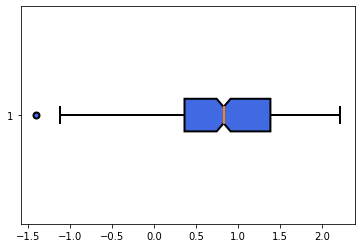

In [ ]:
plt.boxplot(c_nots_with_seq, 
            vert=False, 
            patch_artist=True, 
            notch=True, 
            boxprops=dict(facecolor='royalblue', linewidth=2), 
            medianprops=dict(linewidth=2),
            whiskerprops=dict(linewidth=2),
            capprops=dict(linewidth=2),
            flierprops=dict(markerfacecolor='royalblue', markeredgewidth=2)
)


In [ ]:
my_dict = {}

def get_cnots_with_seq(seq):
  return [c_not for i, c_not in enumerate(c_nots) if seqs[i].find(seq) != -1]


seq = 'GAAGAGC'
my_dict[seq] = get_cnots_with_seq(seq)
for pos in range(7):
  obs = other_bases(seq[pos])
  for ob in obs:
    nseq = seq[:pos] + ob + seq[pos+1:]
    my_dict[nseq] = get_cnots_with_seq(nseq)


In [ ]:
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


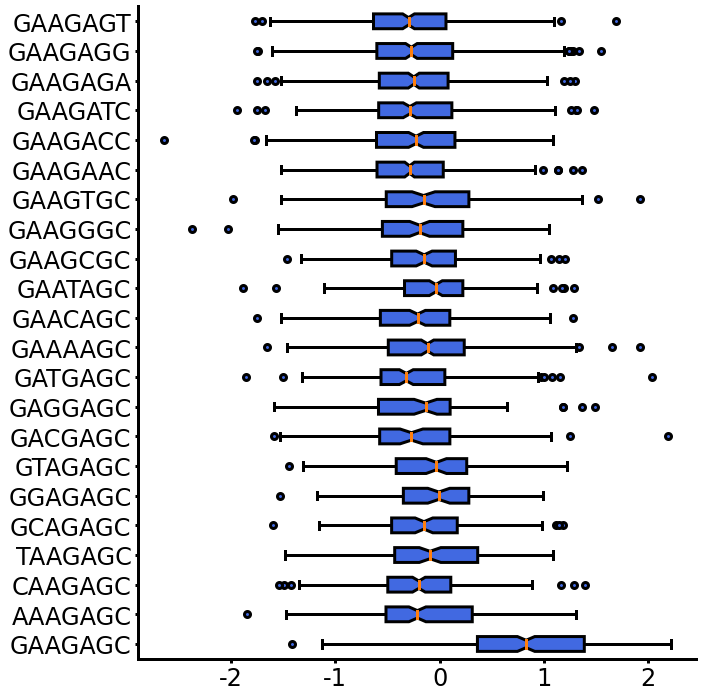

In [ ]:
fig, ax = plt.subplots()
plt.boxplot(my_dict.values(), 
            vert=False, 
            patch_artist=True, 
            notch=True, 
            boxprops=dict(facecolor='royalblue', linewidth=3), 
            medianprops=dict(linewidth=3),
            whiskerprops=dict(linewidth=3),
            capprops=dict(linewidth=3),
            flierprops=dict(markerfacecolor='royalblue', markeredgewidth=3)
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
xticks = [-2, -1, 0, 1, 2]
ax.set_xticks(xticks)
ax.set_xticklabels([str(x) for x in xticks], fontsize=24)
ax.set_yticklabels(my_dict.keys(), fontsize=24)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)

plt.gcf().set_size_inches(10, 12)
plt.savefig('boxplot.svg', format='svg')
plt.show()

In [ ]:
def rc_complement(seq):
  rc_dict = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
  rc_seq = ''.join([rc_dict[c] for c in seq[::-1]])
  return rc_seq

In [ ]:
import itertools

def generate_all_sequences_with(letters: str, len: int):
     yield from itertools.product(*([letters] * len)) 

all_seqs_of_7 = []
their_number = []
for x in generate_all_sequences_with('ACGT', 7):
  seq = ''.join(x)
  all_seqs_of_7.append(seq)
  # their_number.append(get_number_of(seq))
  their_number.append(get_number_of(seq) + get_number_of(rc_complement(seq)))

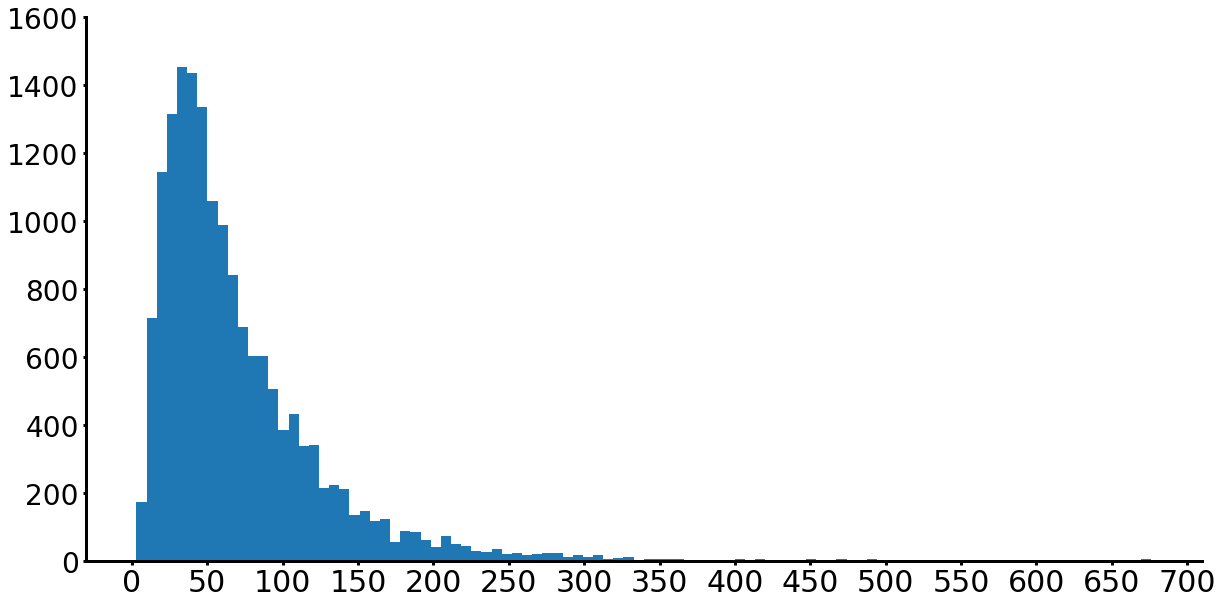

In [ ]:
plt.hist(their_number, bins=100)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_bounds((0, 50))
yticks = [y for y in range(0, 1601, 200)]
ax.set_yticks(yticks)
ax.set_yticklabels([str(y) for y in yticks], fontsize=28)
xticks = [x for x in range(0, 701, 50)]
ax.set_xticks(xticks)
ax.set_xticklabels([str(x) for x in xticks], fontsize=30)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)

plt.gcf().set_size_inches(20, 10)

plt.savefig('fig.svg', format='svg')

plt.show()

In [ ]:
print(len(all_seqs_of_7))

16384


In [ ]:
count_1 = 0
for number in their_number:
  if number >= 120:
    count_1 += 1

print(count_1)


2256
